In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv", 
                 index_col = ["date", "iso_code"], 
                 parse_dates = True)
df.rename(columns = {col:col.replace("_", " ").title() for col in df}, 
                     inplace = True)
countries = df.groupby("iso_code").mean().index

countries2 = df.groupby(["iso_code", "Location"]).mean().index
iso_to_country = dict(countries2)

In [2]:
keys = list(df.keys())[4:]
keys.remove("Tests Units")


In [3]:
df

Continent     Location  Total Cases  New Cases  \
date       iso_code                                                  
2020-02-24 AFG           Asia  Afghanistan          5.0        5.0   
2020-02-25 AFG           Asia  Afghanistan          5.0        0.0   
2020-02-26 AFG           Asia  Afghanistan          5.0        0.0   
2020-02-27 AFG           Asia  Afghanistan          5.0        0.0   
2020-02-28 AFG           Asia  Afghanistan          5.0        0.0   
...                       ...          ...          ...        ...   
2022-01-19 ZWE         Africa     Zimbabwe     226887.0      427.0   
2022-01-20 ZWE         Africa     Zimbabwe     227552.0      665.0   
2022-01-21 ZWE         Africa     Zimbabwe     227961.0      409.0   
2022-01-22 ZWE         Africa     Zimbabwe     228179.0      218.0   
2022-01-23 ZWE         Africa     Zimbabwe     228254.0       75.0   

                     New Cases Smoothed  Total Deaths  New Deaths  \
date       iso_code                                                 
2020-02-24 AFG                      NaN           NaN         NaN   
2020-02-25 AFG                      NaN           NaN         NaN   
2020-02-26 AFG                      NaN           NaN         NaN   
2020-02-27 AFG                      NaN           NaN         NaN   
2020-02-28 AFG                      NaN           NaN         NaN   
...                                 ...           ...         ...   
2022-01-19 ZWE                  350.571        5266.0         8.0   
2022-01-20 ZWE                  352.571        5276.0        10.0   
2022-01-21 ZWE                  332.000        5288.0        12.0   
2022-01-22 ZWE                  363.143        5292.0         4.0   
2022-01-23 ZWE                  310.857        5294.0         2.0   

                     New Deaths Smoothed  Total Cases Per Million  \
date       iso_code                                                 
2020-02-24 AFG                       NaN                    0.126   
2020-02-25 AFG                       NaN                    0.126   
2020-02-26 AFG                       NaN                    0.126   
2020-02-27 AFG                       NaN                    0.126   
2020-02-28 AFG                       NaN                    0.126   
...                                  ...                      ...   
2022-01-19 ZWE                     7.286                15033.424   
2022-01-20 ZWE                     7.714                15077.486   
2022-01-21 ZWE                     7.143                15104.586   
2022-01-22 ZWE                     7.714                15119.031   
2022-01-23 ZWE                     6.714                15124.000   

                     New Cases Per Million  ...  Female Smokers  Male Smokers  \
date       iso_code                         ...                                 
2020-02-24 AFG                       0.126  ...             NaN           NaN   
2020-02-25 AFG                       0.000  ...             NaN           NaN   
2020-02-26 AFG                       0.000  ...             NaN           NaN   
2020-02-27 AFG                       0.000  ...             NaN           NaN   
2020-02-28 AFG                       0.000  ...             NaN           NaN   
...                                    ...  ...             ...           ...   
2022-01-19 ZWE                      28.293  ...             1.6          30.7   
2022-01-20 ZWE                      44.063  ...             1.6          30.7   
2022-01-21 ZWE                      27.100  ...             1.6          30.7   
2022-01-22 ZWE                      14.445  ...             1.6          30.7   
2022-01-23 ZWE                       4.969  ...             1.6          30.7   

                     Handwashing Facilities  Hospital Beds Per Thousand  \
date       iso_code                                                       
2020-02-24 AFG                       37.746                         0.5   
2020-02-25 AFG                    

In [4]:
pivot_df = {}
for key in keys:
    pivot_df[key] = pd.pivot_table(df.reset_index(), 
                                   values=[key],
                                   index=['date'],
                                   columns=['iso_code'])
    pivot_df[key] = pivot_df[key].T.reset_index().set_index("iso_code")
    drop_key = list(pivot_df.keys())[0]
    del pivot_df[key]["level_0"]
    pivot_df[key] = pivot_df[key].T 
    

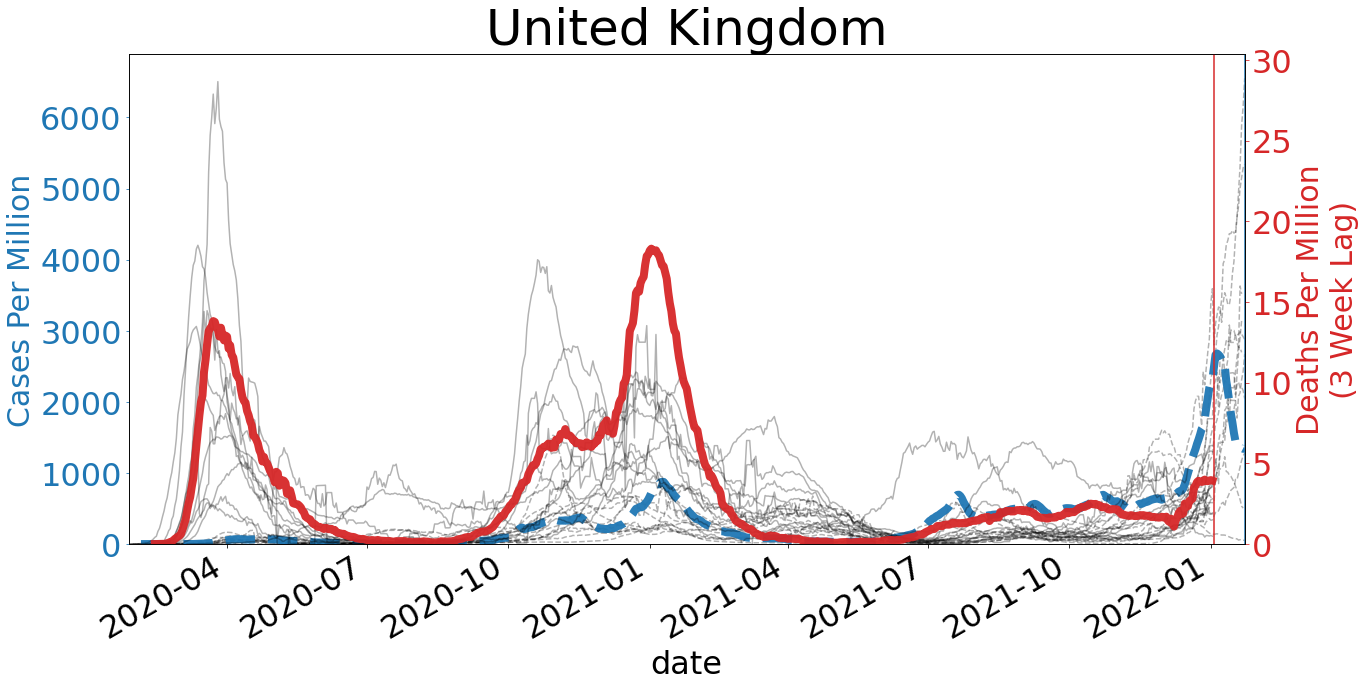

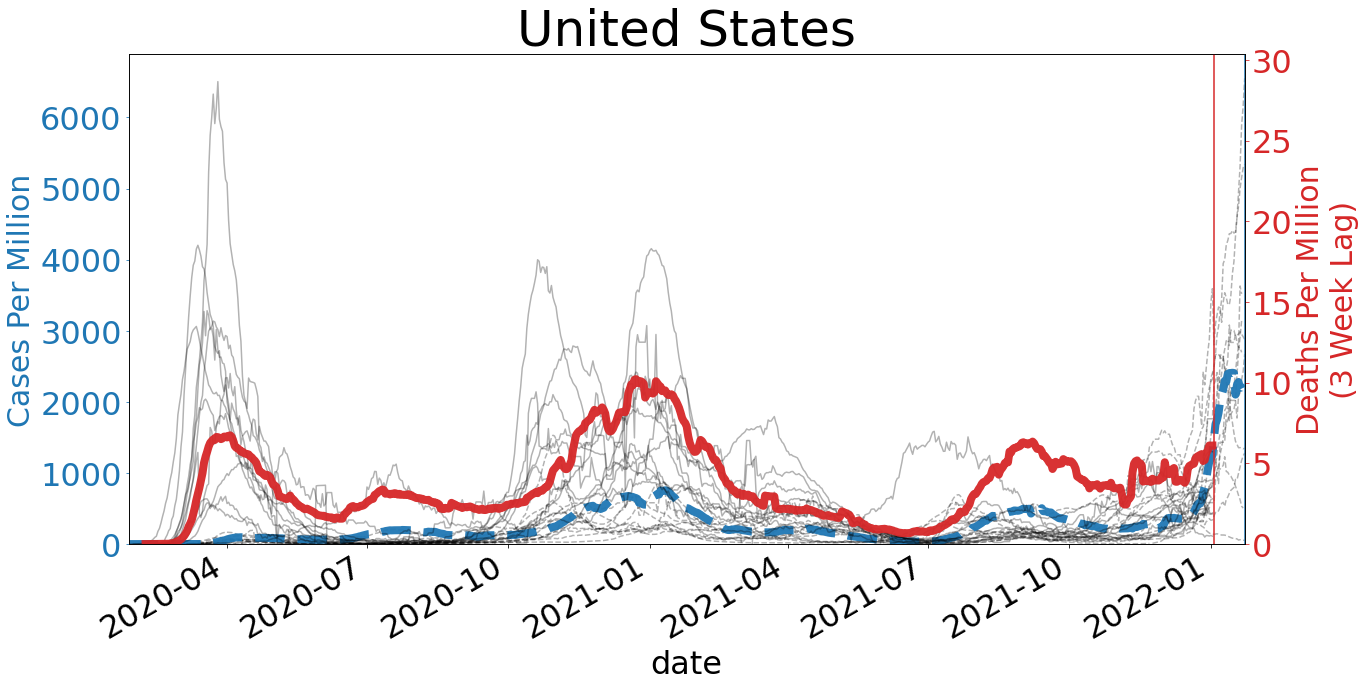

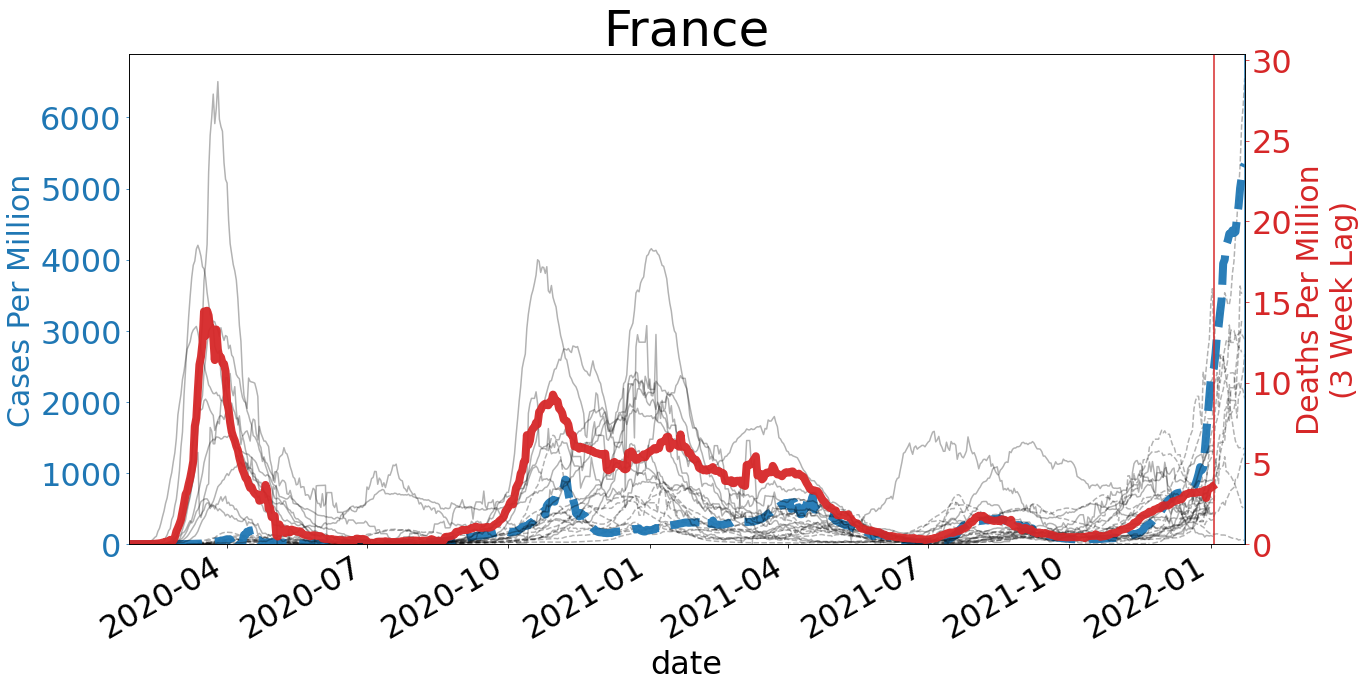

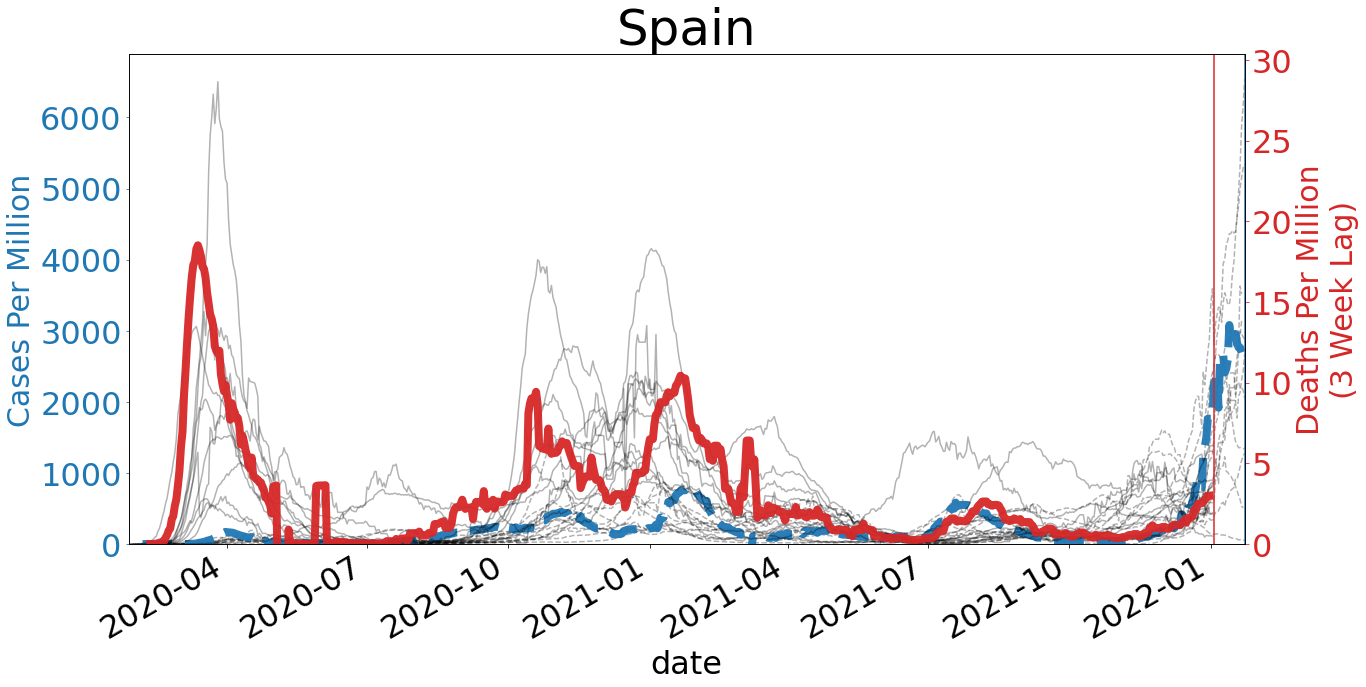

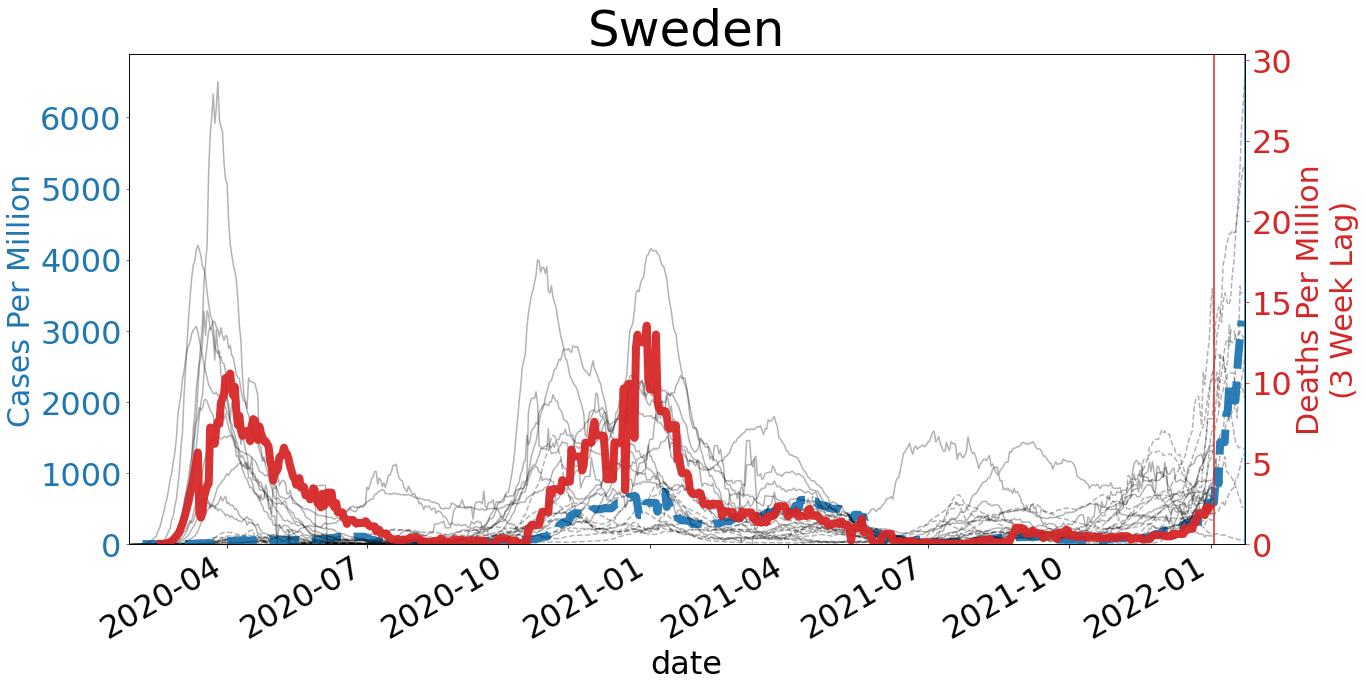

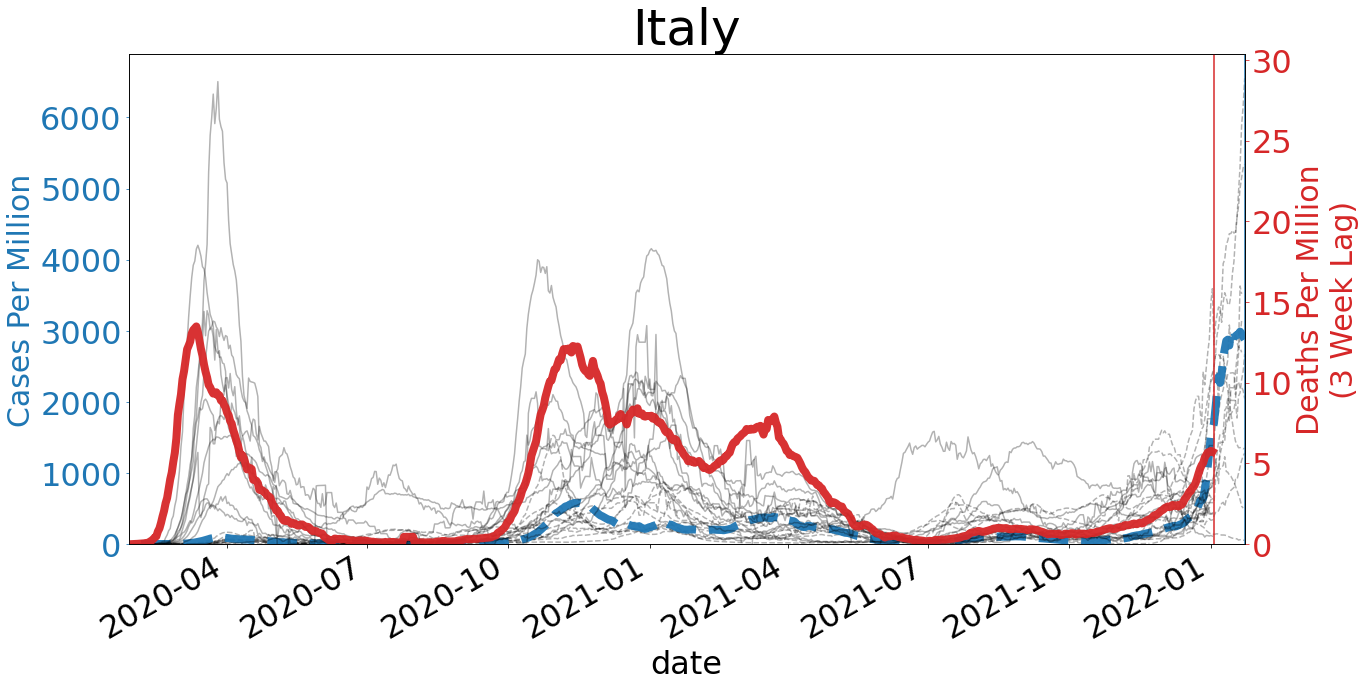

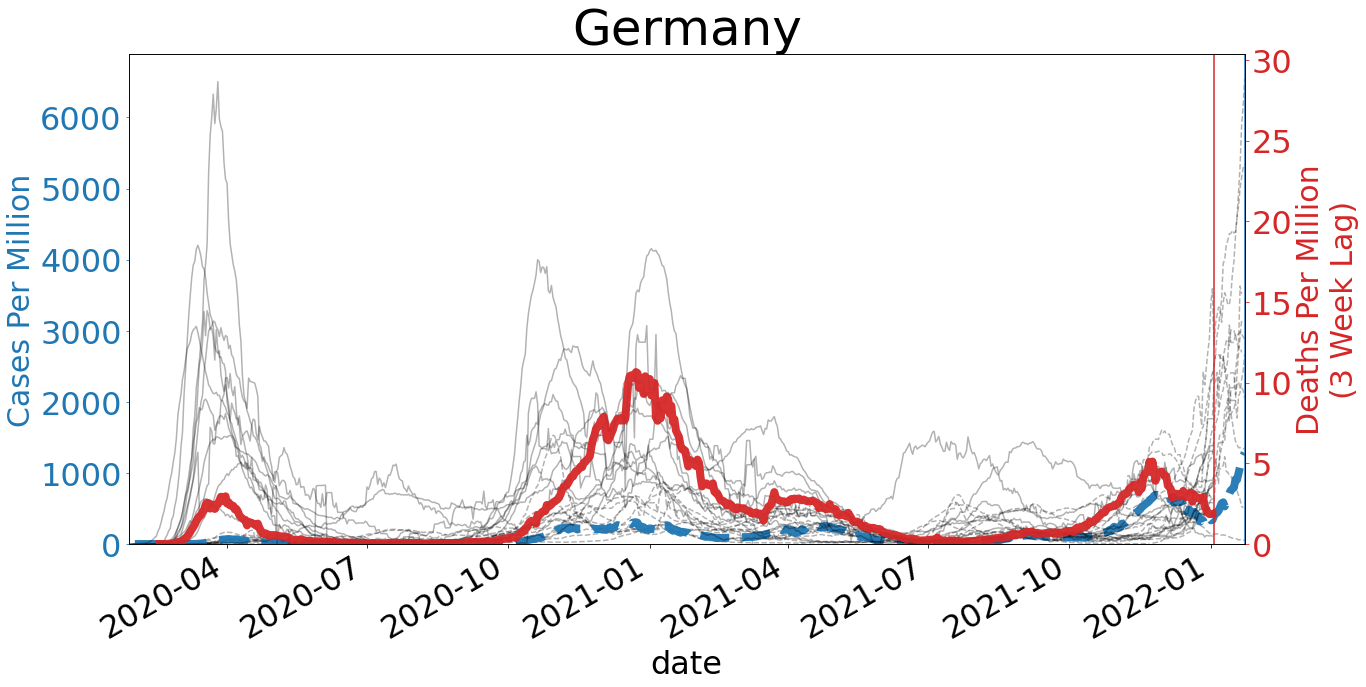

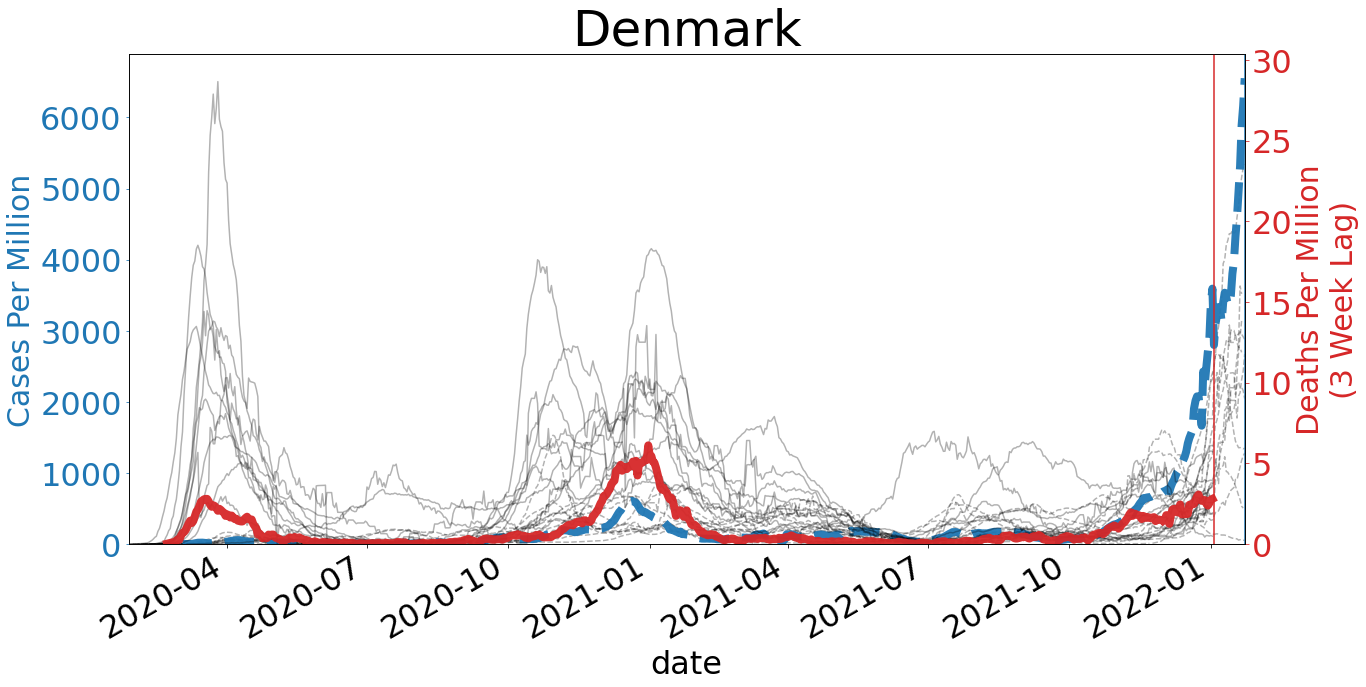

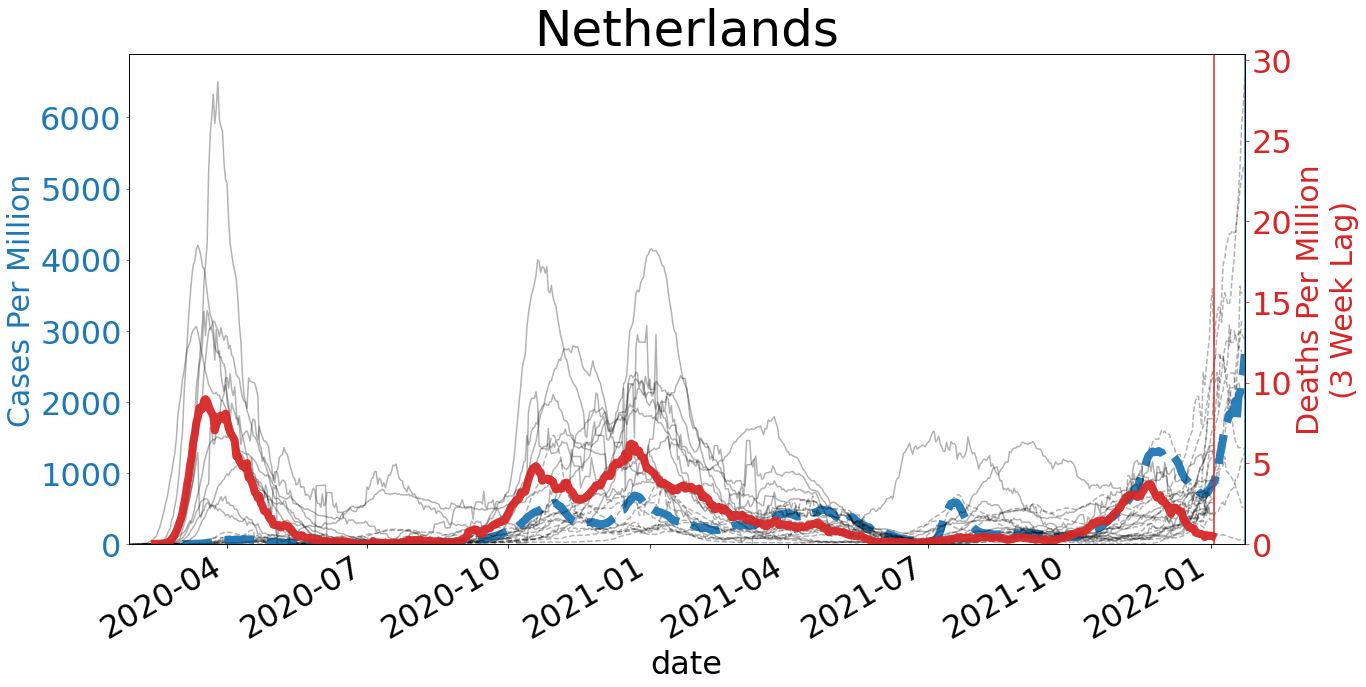

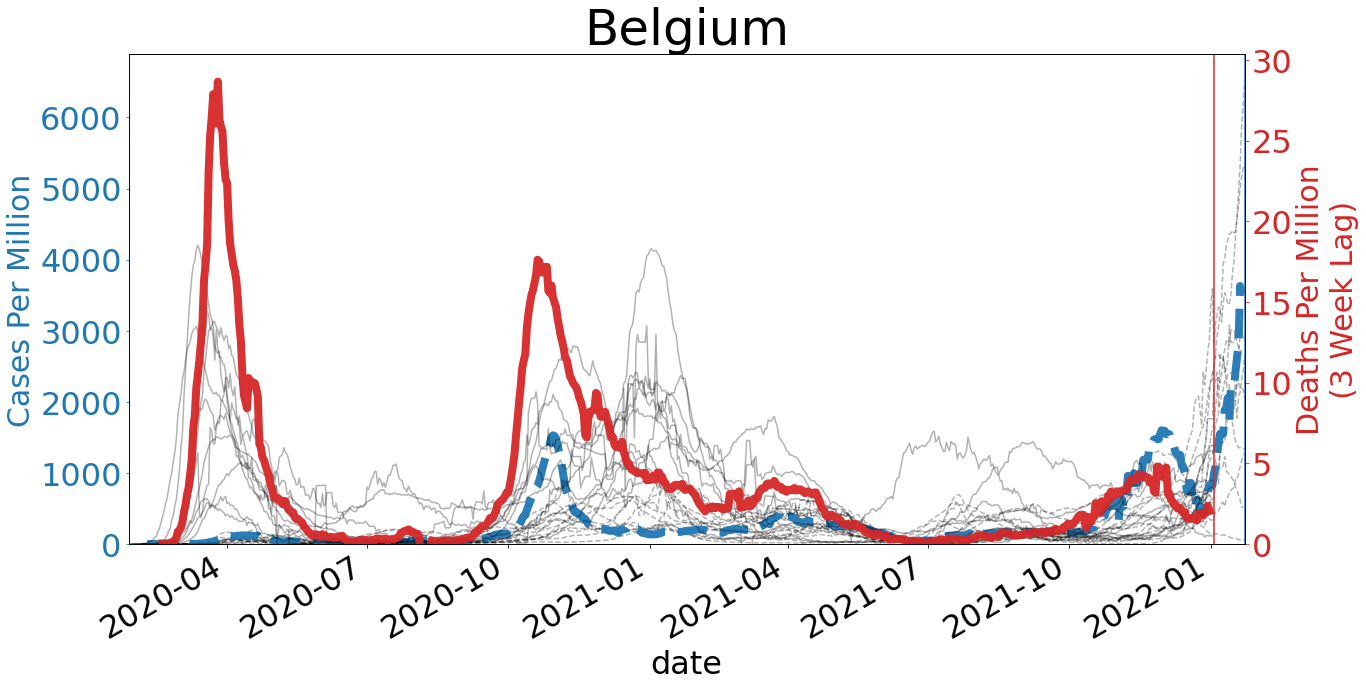

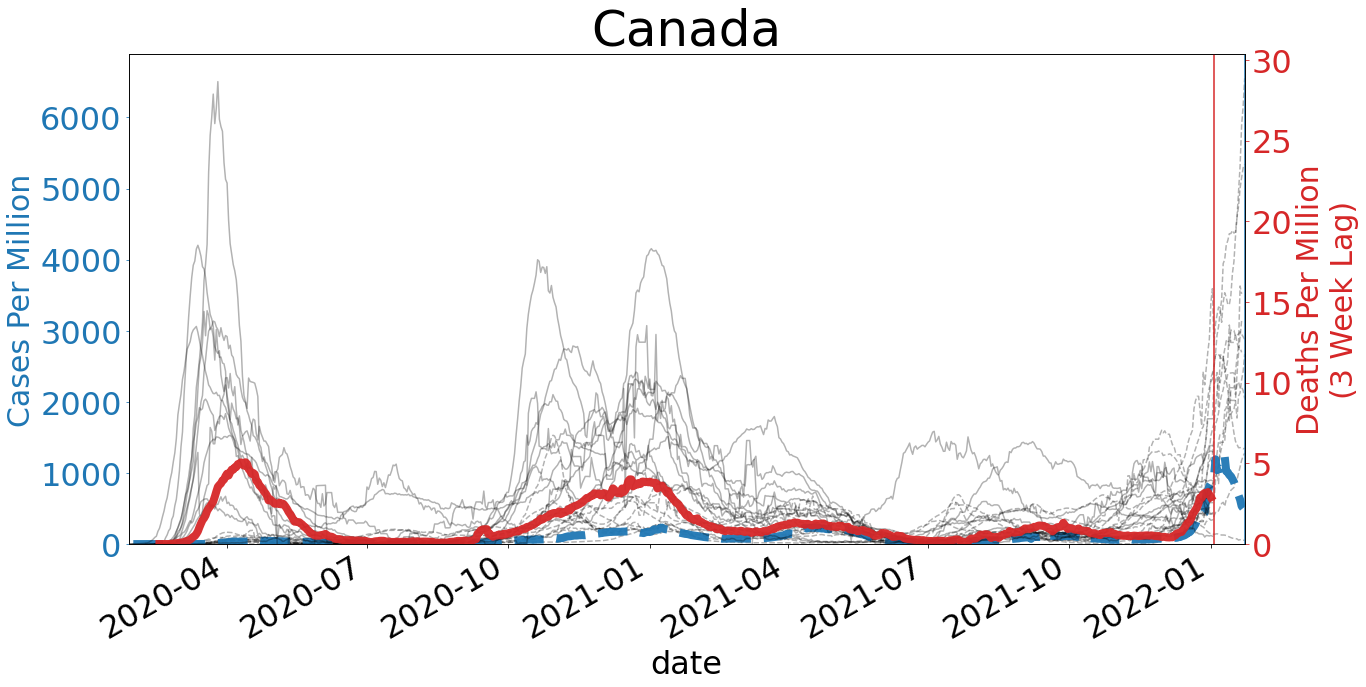

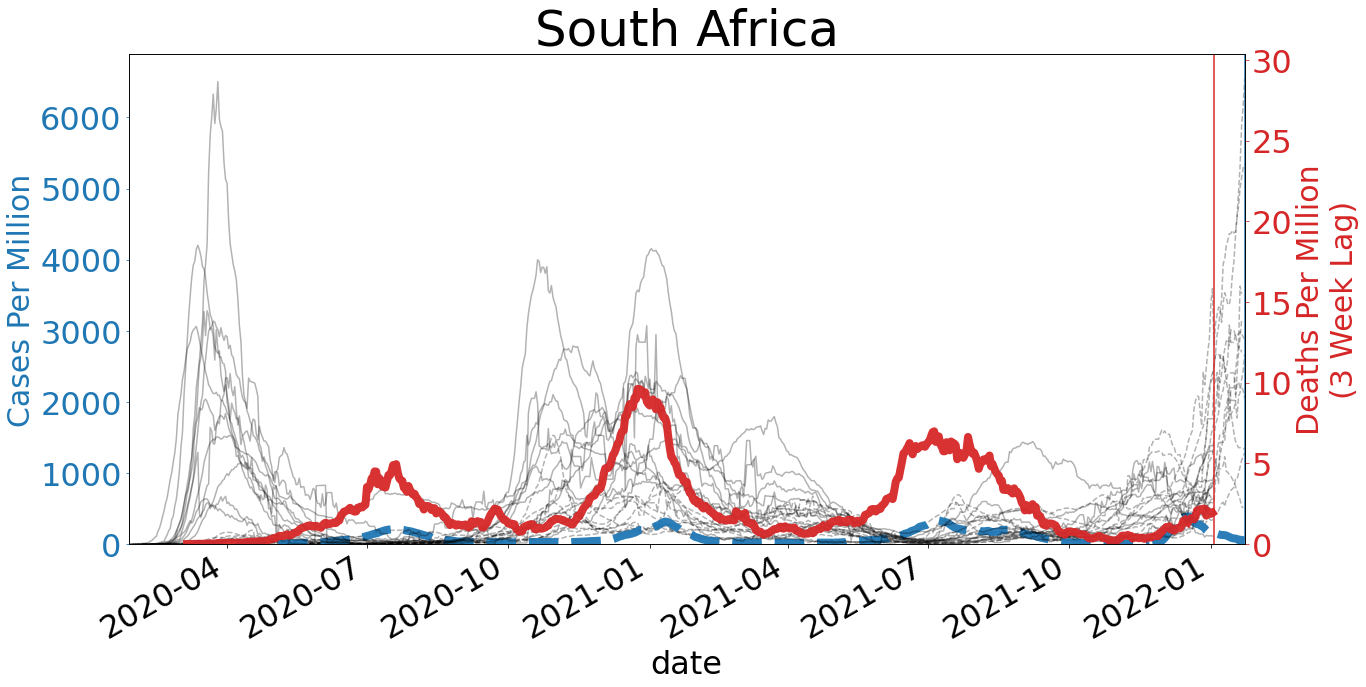

In [5]:
import copy
plt.rcParams.update({'font.size': 32})

plot_df = copy.copy(pivot_df)
plot_df["New Deaths Smoothed Per Million"] = plot_df["New Deaths Smoothed Per Million"].shift(-21)
plot_countries = ["GBR", "USA", "FRA", "ESP", "SWE", "ITA", "DEU","DNK", "NLD", "BEL", "CAN", "ZAF"]

for country in plot_countries:
    fig, ax = plt.subplots(figsize = (20, 10))
    ax.set_title(iso_to_country[country], fontsize = 50)
    ax2 = ax.twinx()
    for name in ["Cases", "Deaths"]:
        ls = "--" if name == "Cases" else "-"
        
        if name == "Deaths":
            a = ax2
        else:
            a = ax
        var_name = "New " + name + " Smoothed Per Million"
        other_countries = [c for c in plot_countries if c != country]
        plot_df[var_name][other_countries].plot.line(
            color = "k",
            alpha = .3,
            ls = ls,
            ax = a,
            legend = False)
        
    for name in ["Cases", "Deaths"]:
        var_name = "New " + name + " Smoothed Per Million"
        if name == "Deaths":
            a = ax2
            color = "C3"
            lag = "\n(3 Week Lag)"
        else:
            a = ax
            color = "C0"
            lag = ""
        ls = "--" if name == "Cases" else "-"
        plot_df[var_name][country].plot.line(
            ls = ls,
            ax=a,
            color = color,
            lw = 8,
            alpha = .95,
            legend = False)
        a.set_ylim(bottom = 0)
        a.set_ylabel(name + " Per Million" + lag, 
                     color = color,
                    fontsize = 30)
        a.tick_params(axis='y', colors=color)        
    a.axvline(plot_df[var_name][country].index[-1])
    a.axvline(plot_df[var_name][country].index[-21], color = "C3")
    a.set_xmargin(0)
    plt.show()

In [6]:
for iso, country in iso_to_country.items():
    print(country)

Aruba
Afghanistan
Angola
Anguilla
Albania
Andorra
United Arab Emirates
Argentina
Armenia
Antigua and Barbuda
Australia
Austria
Azerbaijan
Burundi
Belgium
Benin
Bonaire Sint Eustatius and Saba
Burkina Faso
Bangladesh
Bulgaria
Bahrain
Bahamas
Bosnia and Herzegovina
Belarus
Belize
Bermuda
Bolivia
Brazil
Barbados
Brunei
Bhutan
Botswana
Central African Republic
Canada
Switzerland
Chile
China
Cote d'Ivoire
Cameroon
Democratic Republic of Congo
Congo
Cook Islands
Colombia
Comoros
Cape Verde
Costa Rica
Cuba
Curacao
Cayman Islands
Cyprus
Czechia
Germany
Djibouti
Dominica
Denmark
Dominican Republic
Algeria
Ecuador
Egypt
Eritrea
Spain
Estonia
Ethiopia
Finland
Fiji
Falkland Islands
France
Faeroe Islands
Micronesia (country)
Gabon
United Kingdom
Georgia
Guernsey
Ghana
Gibraltar
Guinea
Gambia
Guinea-Bissau
Equatorial Guinea
Greece
Grenada
Greenland
Guatemala
Guyana
Hong Kong
Honduras
Croatia
Haiti
Hungary
Indonesia
Isle of Man
India
Ireland
Iran
Iraq
Iceland
Israel
Italy
Jamaica
Jersey
Jordan
Japan


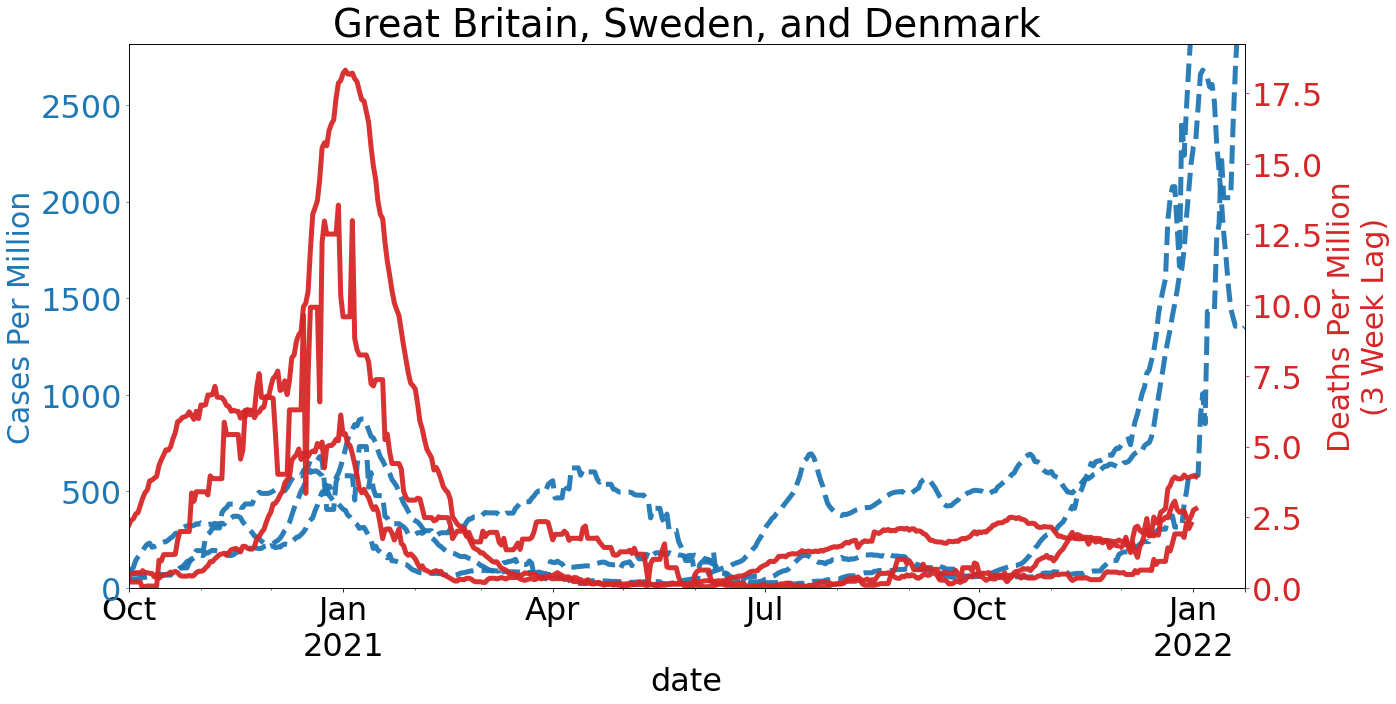

In [7]:
plot_countries = ["GBR", "SWE", "DNK"]

fig, ax = plt.subplots(figsize = (20, 10))
ax2 = ax.twinx()
for country in plot_countries:
#     ax.set_title(iso_to_country[country], fontsize = 50)
    for name in ["Cases", "Deaths"]:
        ls = "--" if name == "Cases" else "-"
        
        if name == "Deaths":
            a = ax2
        else:
            a = ax
        var_name = "New " + name + " Smoothed Per Million"
#         other_countries = [c for c in plot_countries if c != country]
#         plot_df[var_name][other_countries].plot.line(
#             color = "k",
#             alpha = .3,
#             ls = ls,
#             ax = a,
#             legend = False)
        
    for name in ["Cases", "Deaths"]:
        var_name = "New " + name + " Smoothed Per Million"
        if name == "Deaths":
            a = ax2
            color = "C3"
            lag = "\n(3 Week Lag)"
        else:
            a = ax
            color = "C0"
            lag = ""
        ls = "--" if name == "Cases" else "-"
        plot_df[var_name][country].loc["2020-10-01":].plot.line(
            ls = ls,
            ax=a,
            color = color,
            lw = 5,
            alpha = .95,
            legend = False)
        a.set_ylim(bottom = 0)
        a.set_ylabel(name + " Per Million" + lag, 
                     color = color,
                    fontsize = 30)
        a.tick_params(axis='y', colors=color)
        ax.set_xmargin(0)

ax.set_title("Great Britain, Sweden, and Denmark")
plt.show()

In [8]:
# plot_df["IRF"] = plot_df["New Deaths Smoothed Per Million"].div()
plot_df = copy.copy(pivot_df)
plot_df["IRF"] = pivot_df["New Deaths Smoothed Per Million"].copy()
pivot_df["New Deaths Smoothed Per Million"] = pivot_df["New Deaths Smoothed Per Million"].shift(-21)
plot_countries = ["GBR", "USA", "FRA", "ESP", "SWE", "ITA", "DEU","DNK", "NLD", "BEL", "CAN", "ZAF"]
for key in plot_df["New Deaths Smoothed Per Million"]:
    plot_df["IRF"][key] = plot_df["New Deaths Smoothed Per Million"][key].div(plot_df["New Cases Smoothed Per Million"][key])




(0.0, 0.12248835222147156)

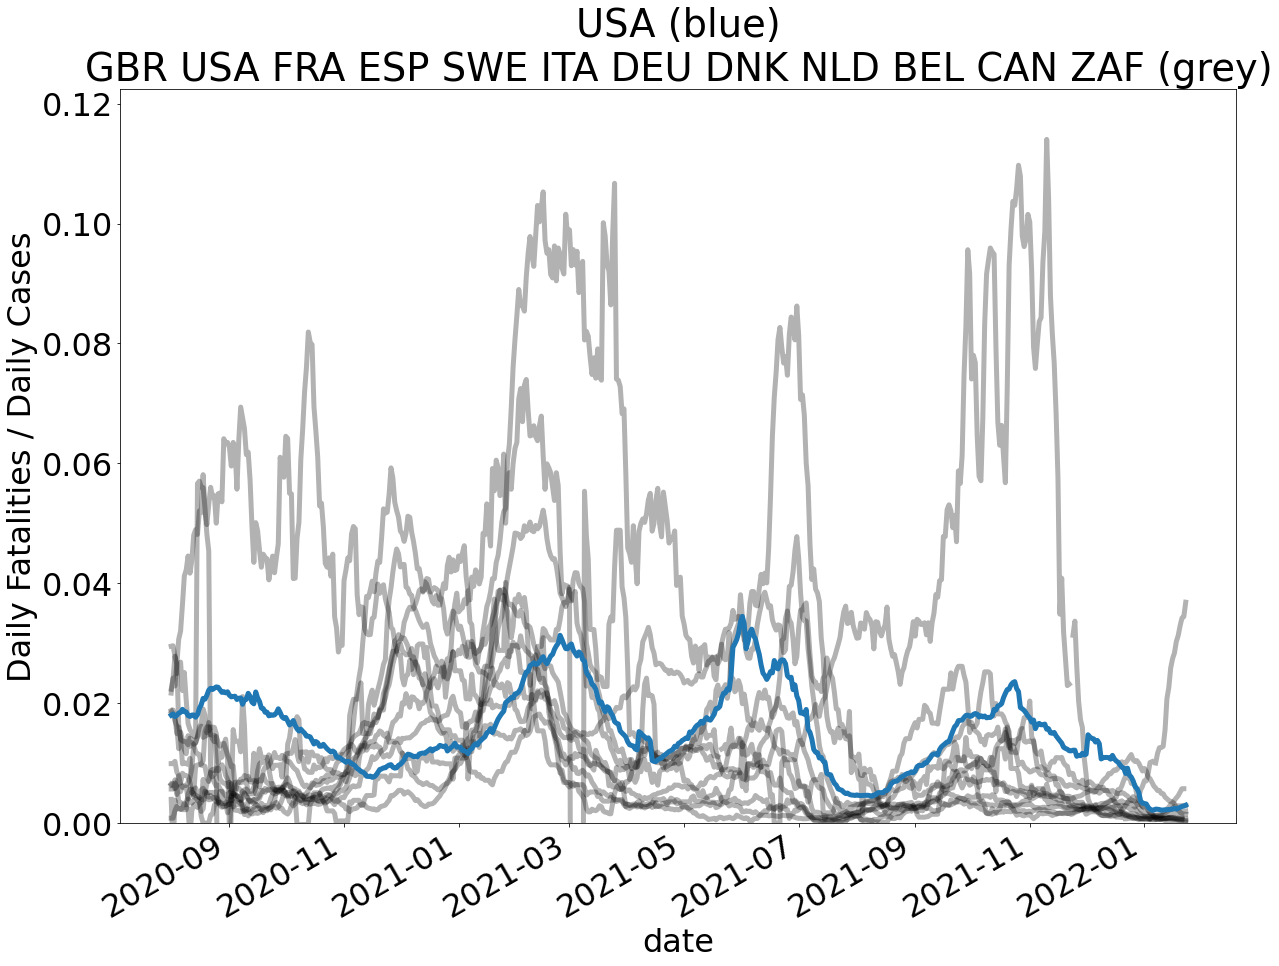

In [9]:
import datetime
fig, ax = plt.subplots(figsize =(20,15))
country = "USA"
other_countries = [c for c in plot_countries if c != country]
plot_df["IRF"].loc[datetime.datetime(2020,8,1):,other_countries].plot.line(
    color = "k",
    alpha = .3,
    linewidth = 5,
    ax = ax,
    legend = False)
plot_df["IRF"].loc[datetime.datetime(2020,8,1):,"USA"].plot(ax = ax, legend =  False,    linewidth = 5)
plt.title("USA (blue)\nGBR USA FRA ESP SWE ITA DEU DNK NLD BEL CAN ZAF (grey)")
ax.set_ylabel("Daily Fatalities / Daily Cases")
ax.set_ylim(0)
# other_countries = [c for c in plot_countries if c != country]
# plot_df[var_name][other_countries].plot.line(
#     color = "k",
#     alpha = .3,
#     ls = ls,
#     ax = a,
#     legend = False)

In [10]:
import datetime
plot_df["IRF"][datetime.datetime(2020,6,1):]

iso_code         ABW       AFG       AGO       AIA       ALB       AND  \
date                                                                     
2020-06-01       NaN  0.009882  0.000000       NaN  0.007234  0.000000   
2020-06-02       NaN  0.010709  0.000000       NaN  0.000000  0.000000   
2020-06-03       NaN  0.013920  0.000000       NaN  0.000000  0.000000   
2020-06-04       NaN  0.013156  0.000000       NaN  0.000000  0.000000   
2020-06-05       NaN  0.011868  0.000000       NaN  0.000000  0.000000   
...              ...       ...       ...       ...       ...       ...   
2022-01-19  0.002060  0.017955  0.012158  0.004082  0.002061  0.001011   
2022-01-20  0.001401  0.014320  0.012871  0.004082  0.002078  0.000908   
2022-01-21  0.001538  0.015898  0.013508  0.006803  0.001948  0.000638   
2022-01-22  0.001667  0.013782  0.012187  0.006803  0.002068       NaN   
2022-01-23  0.004255  0.014961  0.008636  0.000000  0.002333       NaN   

iso_code         ARE       ARG       ARM       ATG  ...       VCT       VEN  \
date                                                ...                       
2020-06-01  0.003679  0.018606  0.021860  0.000000  ...       NaN  0.014499   
2020-06-02  0.003406  0.016680  0.025702  0.000000  ...       NaN  0.011566   
2020-06-03  0.003409  0.015558  0.026179  0.000000  ...       NaN  0.012788   
2020-06-04  0.003336  0.018184  0.020964  0.000000  ...       NaN  0.011867   
2020-06-05  0.003128  0.019945  0.020056  0.000000  ...       NaN  0.007778   
...              ...       ...       ...       ...  ...       ...       ...   
2022-01-19  0.000923  0.001225  0.005794  0.001898  ...  0.071435  0.001933   
2022-01-20  0.001052  0.001278  0.004769  0.001898  ...  0.124990  0.001857   
2022-01-21  0.001059  0.001402  0.003826  0.003515  ...  0.147049  0.001758   
2022-01-22  0.001111  0.001460  0.002272  0.003279  ...  0.147049  0.001679   
2022-01-23  0.001125  0.001469  0.002197       NaN  ...  0.147049  0.001713   

iso_code         VGB       VNM  VUT  WLF       YEM       ZAF       ZMB  \
date                                                                     
2020-06-01       NaN       NaN  NaN  NaN  0.329806  0.020855  0.000000   
2020-06-02       NaN       NaN  NaN  NaN  0.253201  0.020017  0.000000   
2020-06-03       NaN       NaN  NaN  NaN  0.256510  0.020710  0.000000   
2020-06-04       NaN       NaN  NaN  NaN  0.263415  0.020247  0.000000   
2020-06-05       NaN       NaN  NaN  NaN  0.247991  0.020935  0.000000   
...              ...       ...  ...  ...       ...       ...       ...   
2022-01-19  0.013944  0.009637  NaN  NaN  0.030755  0.031282  0.004819   
2022-01-20  0.010687  0.009183  NaN  NaN  0.028816  0.032895  0.005368   
2022-01-21       NaN  0.009243  NaN  NaN  0.020012  0.034196  0.005957   
2022-01-22       NaN  0.009411  NaN  NaN  0.020012  0.034442  0.006156   
2022-01-23       NaN  0.009415  NaN  NaN  0.014744  0.036835  0.006360   

iso_code         ZWE  
date                  
2020-06-01  0.000000  
2020-06-02  0.000000  
2020-06-03  0.000000  
2020-06-04  0.000000  
2020-06-05  0.000000  
...              ...  
2022-01-19  0.020793  
2022-01-20  0.021874  
2022-01-21  0.021502  
2022-01-22  0.021237  
2022-01-23  0.021605  

[602 rows x 214 columns]